# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Matplotlib](#Section-1)


---

### Section 1

#### Exercise 1.1
##### Using the data in `weather.csv`, line plot the daily average temperature (`TAVG`) for both LA and NYC. Make sure to get the date to be the x axis.

Make sure to import packages first!

#### Python

In [16]:
#import data and display it
import pandas as pd
df = pd.read_csv('../Class_Data/weather.csv')
df.head()

,date,city,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,2020-01-01,Atlanta,7.2,0.0,0.0,45.0,57.0,36.0
1,2020-01-01,Boston,15.4,0.0,0.0,39.0,43.0,36.0
2,2020-01-01,Chicago,11.9,0.0,0.0,28.0,42.0,21.0
3,2020-01-01,Honolulu,6.3,0.0,NaN,76.0,81.0,68.0
4,2020-01-01,Houston,6.5,0.1,0.0,52.0,60.0,47.0


In [17]:
# get proper city labels... yup "NYC" and "LA" are correct
df.city.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Honolulu', 'Houston', 'LA',
       'Miami', 'NYC', 'Phoenix', 'SF', 'Seattle'], dtype=object)

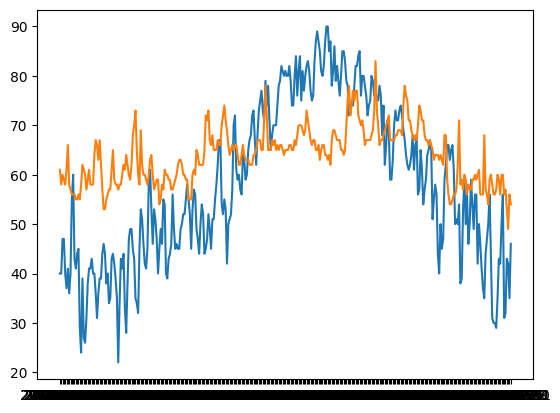

In [18]:
# make new dataframes
dfnyc = df[df.city == "NYC"]
dfla = df[df.city == "LA"]

from matplotlib import pyplot as plt

plt.plot(dfnyc.date, dfnyc.TAVG)
plt.plot(dfla.date, dfla.TAVG)

better way (though you haven't learned it) is to format the date and then set as index

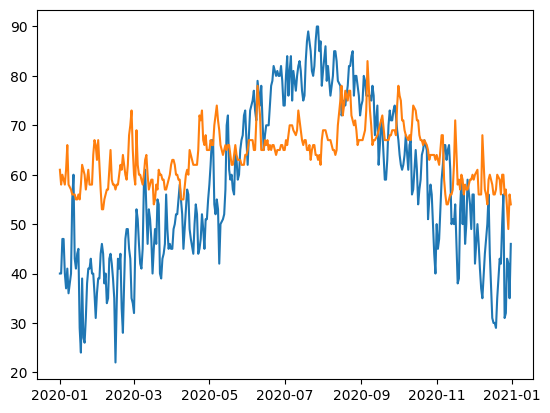

In [20]:
df = pd.read_csv('../Class_Data/weather.csv')
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.sort_index()

dfnyc = df[df.city == "NYC"]
dfla = df[df.city == "LA"]

# the x axis is automatically assumed to be the index
plt.plot(dfnyc.TAVG)
plt.plot(dfla.TAVG)

#### R

In [4]:
install.packages('tidyverse')
library('dplyr')
library('ggplot2')

Installing package into ‘/home/dave/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gargle’, ‘curl’, ‘ids’, ‘openssl’, ‘systemfonts’, ‘textshaping’, ‘googledrive’, ‘googlesheets4’, ‘httr’, ‘ragg’, ‘rvest’, ‘xml2’


Warning message in install.packages("tidyverse"):
“installation of package ‘curl’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘openssl’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘xml2’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ids’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of packag

In [5]:
df = readr::read_csv('../Class_Data/weather.csv')

Rows: 3751 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): city
dbl  (6): AWND, PRCP, SNOW, TAVG, TMAX, TMIN
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


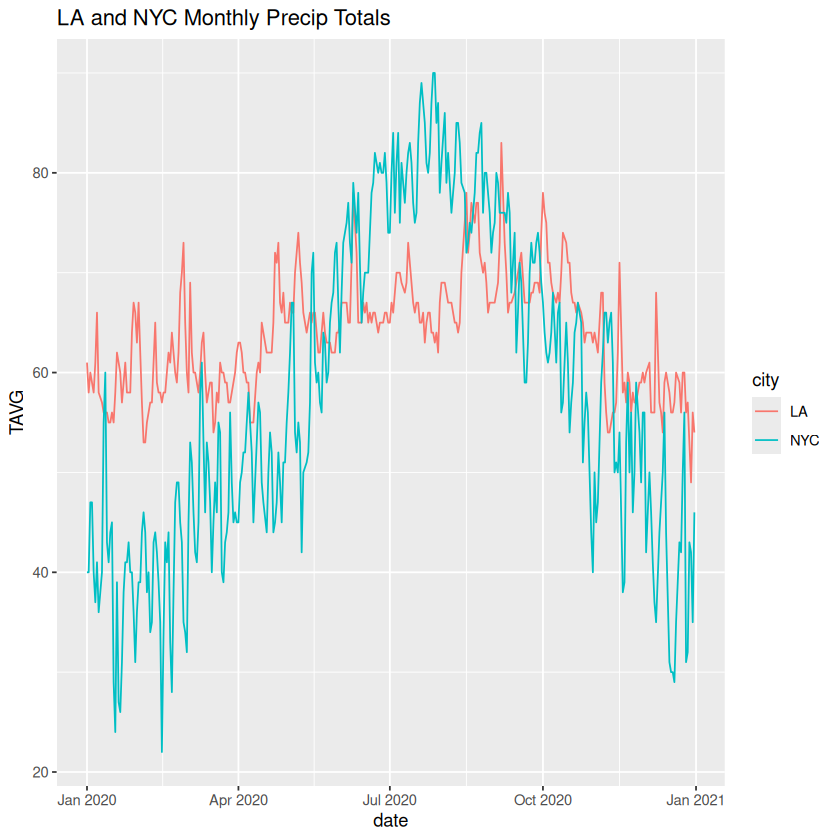

In [6]:
dfnyc = df %>% filter(city %in% c("NYC","LA"))
dfla = df |> filter(city=="LA")

ggplot(data = dfnyc, aes(x=date, y=TAVG, color=city) ) +
    geom_line() +
    labs(title = "LA and NYC Monthly Precip Totals")


#### Exercise 1.2
##### Using the data in `weather.csv`, make a bar plot showing total monthly precipitation (`PRCP`) in Seattle. Make sure to add appropriate titles, and axis labels!

##### Python

Hint: use `resample()` -- date column has to be formated as date and set as index.

In [5]:
import pandas as pd

df = pd.read_csv('../Class_Data/weather.csv')
df['date'] = pd.to_datetime(df.date)
df = df.set_index('date')

dfs = df[df.city == "Seattle"]
dfs_resampled = dfs.resample("ME")['PRCP'].sum()

dfs_resampled

date
2020-01-31    9.17
2020-02-29    4.05
2020-03-31    3.17
2020-04-30    1.70
2020-05-31    3.11
2020-06-30    2.26
2020-07-31    0.16
2020-08-31    0.22
2020-09-30    2.44
2020-10-31    2.45
2020-11-30    4.87
2020-12-31    4.42
Freq: ME, Name: PRCP, dtype: float64

Text(0, 0.5, 'Inches')

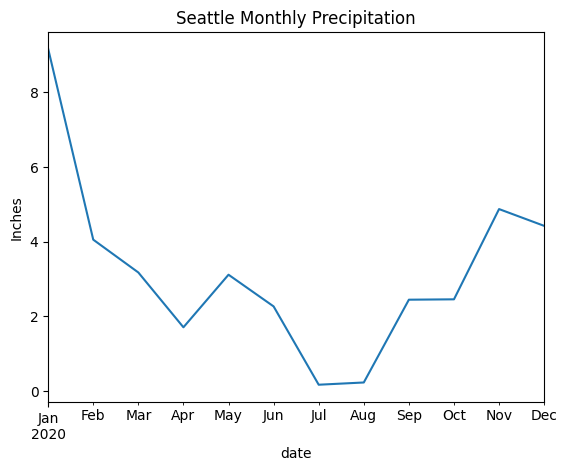

In [7]:
ax = dfs_resampled.plot()
ax.set_title('Seattle Monthly Precipitation')
ax.set_ylabel('Inches')

##### R

* Hint: use `group_by(month = format(date, '%Y-%m'))`
* Hint2: don't use `geom_bar()`, use `geom_col()`

In [ ]:
install.packages('tidyverse')
library('dplyr')
library('ggplot2')
df = readr::read_csv('../Class_Data/weather.csv')

In [4]:
dfs = df |> filter(city=="Seattle") |> group_by(month = format(date, '%Y-%m')) |> summarize(prcp=sum(PRCP))
dfs

month,prcp
<chr>,<dbl>
2020-01,9.17
2020-02,4.05
2020-03,3.17
2020-04,1.70
2020-05,3.11
2020-06,2.26
2020-07,0.16
2020-08,0.22
2020-09,2.44


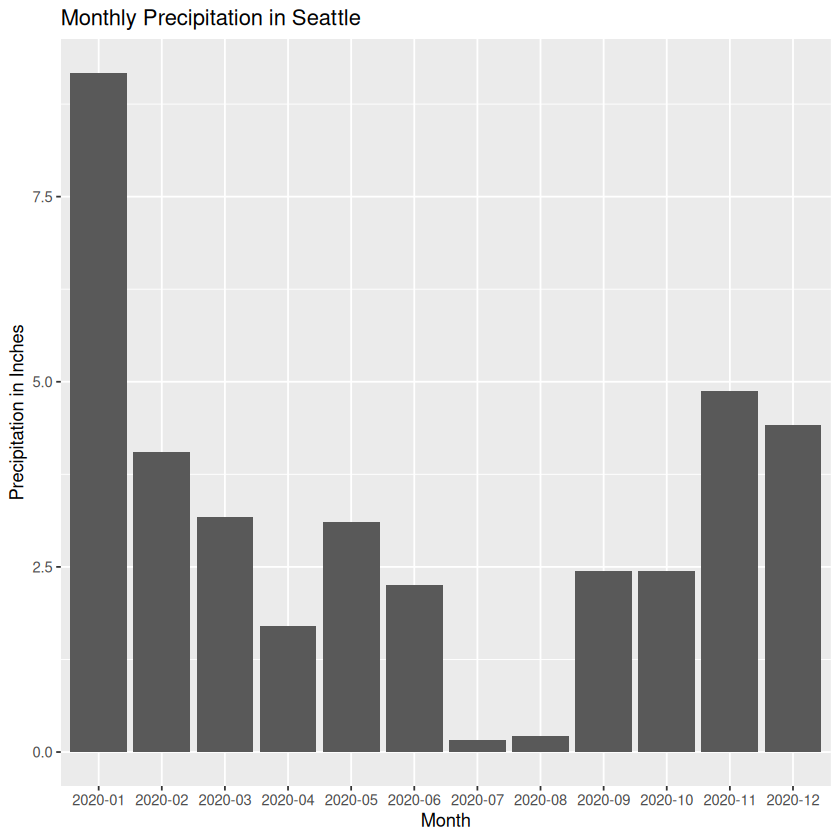

In [8]:
ggplot(data=dfs,) + 
  geom_col(aes(x=month, y=prcp)) +
  labs(title = "Monthly Precipitation in Seattle",
       x= "Month",
       y= "Precipitation in Inches")

#### Exercise 1.3
##### Using the data in `weather.csv`, create a stacked horizontal bar plot of total precipitation per city per quarter (each city will have four segments &ndash; one for the total precipitation in each quarter of the year).

##### Python

* Hint: run something like `df['quarter'] = df['date'].dt.quarter` to make a quarter column.
* Hint2: you'll be doing a groupby and summing PRCP. At the end of that line use `unstack()` to make a dataframe where index is cities and columns are each of the quarters, 1 2 3 and 4. (You can also use `pivot()` to do this but `unstack()` is easier.
* Hint3: Run the plot() method of the pandas dataframe rather than as a method of plt.

<Axes: ylabel='city'>

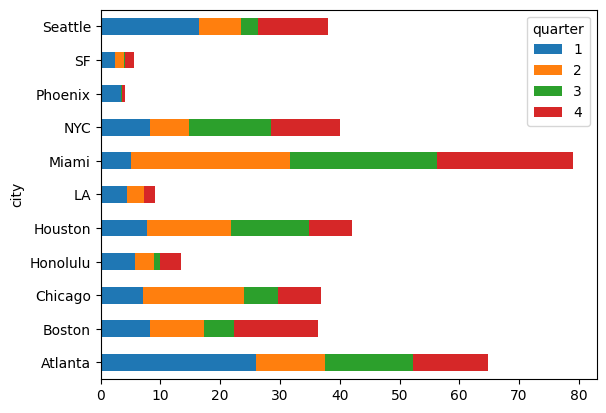

In [97]:
import pandas as pd
df = pd.read_csv('../Class_Data/weather.csv')
df['date'] = pd.to_datetime(df.date)
df['quarter'] = df['date'].dt.quarter

dfq = df.groupby(['city', 'quarter'])['PRCP'].sum().unstack()

dfq.plot(kind='barh', stacked=True, )

##### R
* Hint: this line will be useful: `df <- df %>%  mutate(date = as.Date(date), quarter = lubridate::quarter(date))`. Import that library to make the quarter column.

In [33]:
library(dplyr)
library(lubridate)
df = readr::read_csv('../Class_Data/weather.csv')

Rows: 3751 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): city
dbl  (6): AWND, PRCP, SNOW, TAVG, TMAX, TMIN
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [34]:
df <- df %>%
  mutate(date = as.Date(date),
         quarter = quarter(date))

In [35]:
df = df |> group_by(city, quarter) |> summarize(prcp = sum(PRCP))

`summarise()` has grouped output by 'city'. You can override using the `.groups` argument.


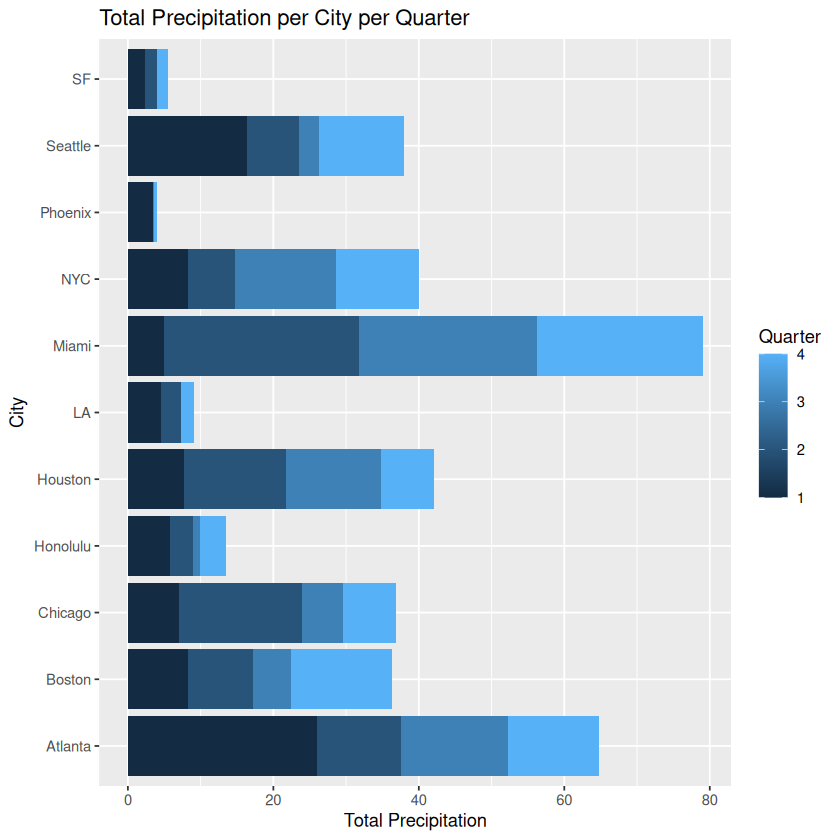

In [37]:
ggplot(df, aes(x = prcp, y = city, fill = quarter)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Total Precipitation per City per Quarter",
       x = "Total Precipitation",
       y = "City",
       fill = "Quarter")

#### Exercise 1.4
##### Using the data in `weather.csv`, generate histograms for the daily average wind (`AWND`) in LA and NYC. Make sure the histograms are on the same plot.

In [6]:
df

,date,city,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,2020-01-01,Atlanta,7.2,0.00,0.0,45.0,57.0,36.0
1,2020-01-01,Boston,15.4,0.00,0.0,39.0,43.0,36.0
2,2020-01-01,Chicago,11.9,0.00,0.0,28.0,42.0,21.0
3,2020-01-01,Honolulu,6.3,0.00,NaN,76.0,81.0,68.0
4,2020-01-01,Houston,6.5,0.10,0.0,52.0,60.0,47.0
...,...,...,...,...,...,...,...,...
3746,2020-12-31,Miami,16.6,0.00,NaN,76.0,81.0,73.0
3747,2020-12-31,NYC,10.7,0.53,0.0,46.0,50.0,38.0
3748,2020-12-31,Phoenix,5.1,0.00,NaN,51.0,60.0,41.0
3749,2020-12-31,SF,9.8,0.03,NaN,54.0,60.0,47.0


##### Python

easy with seaborn

<Axes: xlabel='AWND', ylabel='Count'>

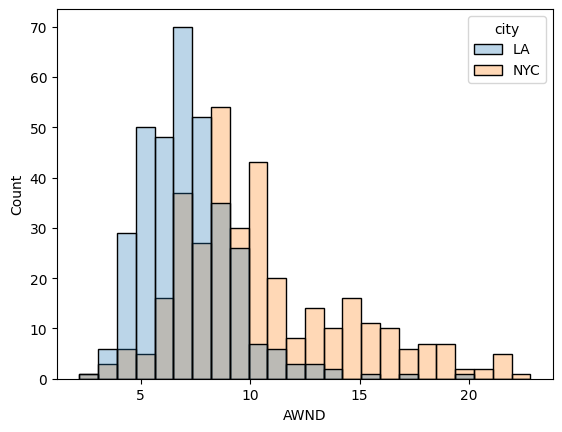

In [22]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../Class_Data/weather.csv')
df = df[df.city.isin(['NYC','LA'])]
sns.histplot(df, hue='city', x='AWND', alpha=0.3)

Slightly more complicated with plain old matplotlib

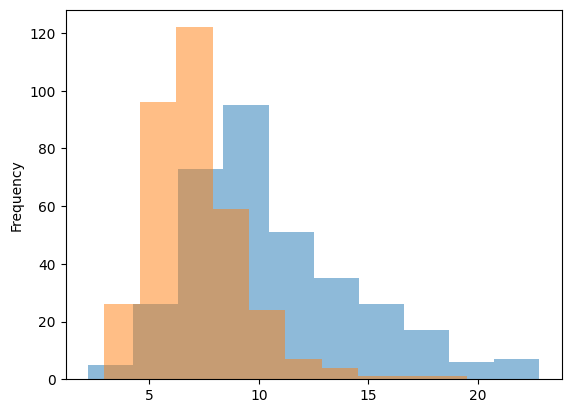

In [25]:
from matplotlib import pyplot as plt

df = pd.read_csv('../Class_Data/weather.csv')

for i in ['NYC','LA']:
    ax = df[df.city == i].AWND.plot(kind='hist', alpha=0.5)

plt.show()

##### R

* Hint: use `fill=factor(city)` in your asthetics

In [9]:
library(dplyr)
library(lubridate)
library(ggplot2)
df <- readr::read_csv('../Class_Data/weather.csv')

Rows: 3751 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): city
dbl  (6): AWND, PRCP, SNOW, TAVG, TMAX, TMIN
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
df <- df |> filter(city %in% c('LA','NYC'))

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


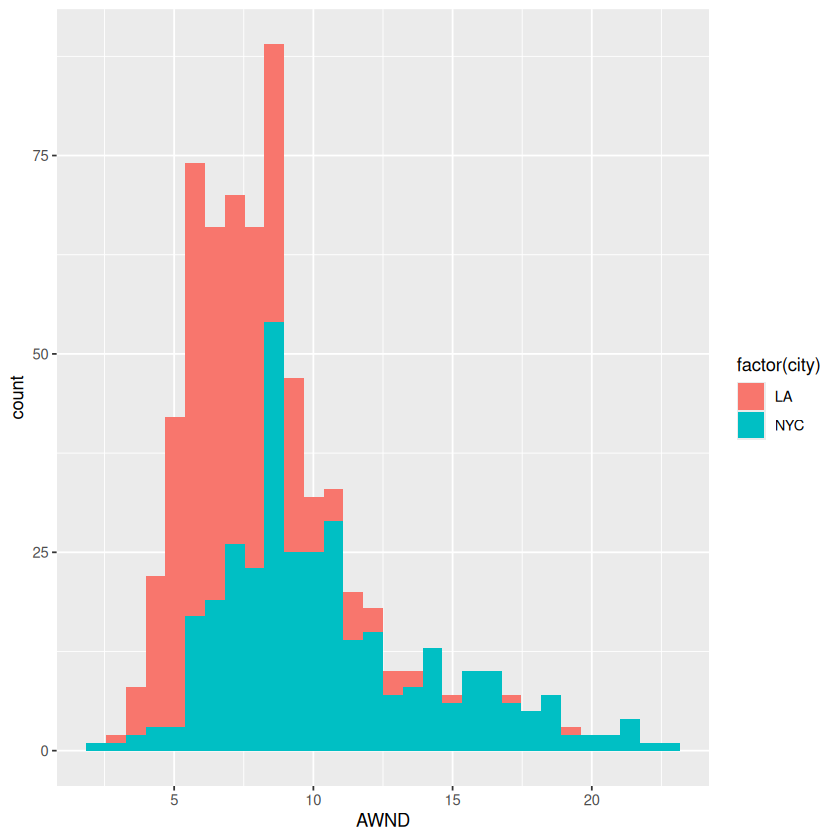

In [14]:
ggplot(df, aes(x=AWND, fill=factor(city))) +
       geom_histogram()